# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [230]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']


### Now take a look at the shapes of the X and y matricies 

In [231]:
display(X.shape)
display(y.shape)

(70000, 784)

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [37]:
digit=X.iloc[36000].values
display(y.iloc[36000])

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

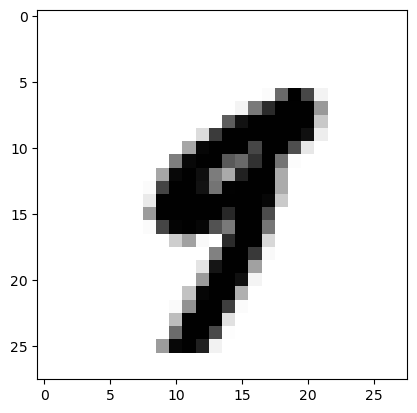

In [38]:
import matplotlib.pyplot as plt
digit=digit.reshape(28,28)

plt.imshow(digit, cmap=matplotlib.cm.binary, interpolation='nearest')


### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [59]:

display(y.iloc[36000])

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [233]:
X_train=X.iloc[:60000]
y_train=y.iloc[:60000]

X_test=X.iloc[60000:]
y_test=y.iloc[60000:]



In [131]:
y_test['class'].unique()

['5', '2', '0', '4', '9', '6', '3', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [98]:
import pandas as pd

In [234]:
#y_train[y_train=='5']=1
#y_test_5=y_test[y_test=='5']
#y_train_5=y_train['class'].apply(lambda x: "1" if x == "5" else "0")
#y_test_5=y_train['class'].apply(lambda x: "1" if x == "5" else "0")
y_train=y_train.astype('int')
y_test=y_test.astype('int')
#y_train_5=y_train.replace({0:0,1:0,2:0,3:0,4:0,5:1,6:0,7:0,8:0,9:0})
#y_test_5=y_test.replace({0:0,1:0,2:0,3:0,4:0,5:1,6:0,7:0,8:0,9:0})
y_train_5=np.where(y_train == 5, 1, 0)
y_test_5=np.where(y_test == 5, 1, 0)

#y_train_5=y_train.loc[y_train.cat.codes == 5]=1

In [209]:
np.unique(y_test_5)

array([0, 1])

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
log_model=LogisticRegression()
#trans=PowerTransformer()
#trans.fit(X_train)
#X_train_model = trans.transform(X_train)
#X_test_model  = trans.transform(X_test)

log_model.fit(X_train, y_train_5)



c:\Users\gemma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [235]:
y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)



In [236]:
confusion_matrix_train_log = metrics.confusion_matrix(y_train_5, y_pred_train_log)
confusion_matrix_test_log = metrics.confusion_matrix(y_test_5, y_pred_test_log)

display(confusion_matrix_train_log)

display(confusion_matrix_test_log)

array([[54153,   426],
       [  905,  4516]], dtype=int64)

array([[9034,   74],
       [ 147,  745]], dtype=int64)

### Does the classifier predict correctly the 36000th digit we picked before?

In [212]:
y_pred_train_log[35999] 
#35999 is false positive, real number =0
#36000 is correct, as negative. real number =9

1

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [237]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [238]:
never_5_clf.fit(X_train_model, y_train_5)
n5_pred_train=never_5_clf.predict(X_train_model)
n5_pred_test=never_5_clf.predict(X_test_model)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [239]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score ## add f1_score
from sklearn.metrics import plot_confusion_matrix
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall','F1_score'],
                               'Train': [accuracy_score(y_train_5, y_pred_train_log),
                                         precision_score(y_train_5, y_pred_train_log),
                                         recall_score(y_train_5, y_pred_train_log),
                                         f1_score(y_train_5, y_pred_train_log)],
                               'Test': [accuracy_score(y_test_5, y_pred_test_log),
                                        precision_score(y_test_5, y_pred_test_log),
                                        recall_score(y_test_5, y_pred_test_log), 
                                        f1_score(y_train_5, y_pred_train_log)]})
performance_dumb = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall','F!_score'],
                               'Train': [accuracy_score(y_train_5, n5_pred_train),
                                         precision_score(y_train_5, n5_pred_train),
                                         recall_score(y_train_5, n5_pred_train),
                                         f1_score(y_train_5, n5_pred_train)],
                               'Test': [accuracy_score(y_test_5, n5_pred_test),
                                        precision_score(y_test_5, n5_pred_test),
                                        recall_score(y_test_5, n5_pred_test),
                                        f1_score(y_train_5, n5_pred_train)]})


c:\Users\gemma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gemma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [240]:
display(performance_log)
display(performance_dumb)

,Error_metric,Train,Test
0,Accuracy,0.977817,0.977900
1,Precision,0.913800,0.909646
2,Recall,0.833057,0.835202
3,F1_score,0.871562,0.871562


,Error_metric,Train,Test
0,Accuracy,0.90965,0.9108
1,Precision,0.00000,0.0000
2,Recall,0.00000,0.0000
3,F!_score,0.00000,0.0000


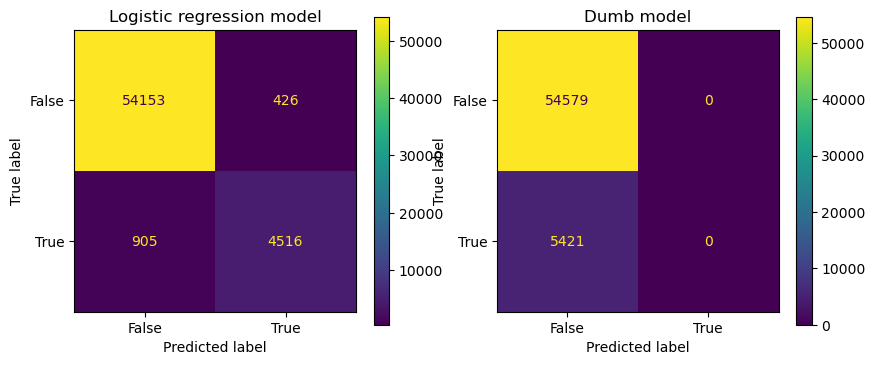

In [241]:
from sklearn import metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
confusion_matrix_train_log = metrics.confusion_matrix(y_train_5, y_pred_train_log)
cm_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train_log, display_labels = [False, True]).plot(ax = ax1)
ax1.title.set_text('Logistic regression model')
confusion_matrix_train_dumb = metrics.confusion_matrix(y_train_5, n5_pred_train)
cm_display_train_dumb = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train_dumb, display_labels = [False, True]).plot(ax = ax2)
ax2.title.set_text('Dumb model')

In [220]:
metrics.confusion_matrix(y_test_5, y_pred_test_log)


array([[6880,   65],
       [2338,  717]], dtype=int64)

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
"""
Logistic model as 97% accuracy, it accurately predicts true positives and true negatives 97% of the time.
Logistic model recall is 80%, and thus correctly predicts true positives 80% of the time (measure of accurate the model is in identifying true positives). 
Howevere, this sensitivity markedly drops in test sample, thus not a great model 
Logistic model precision is 90%...

the dumb model apparently has 90% accuracy but fails in all other stats. this is because it manages to predict most of the negative values, 
but fails to predict any of the postive values

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

c:\Users\gemma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


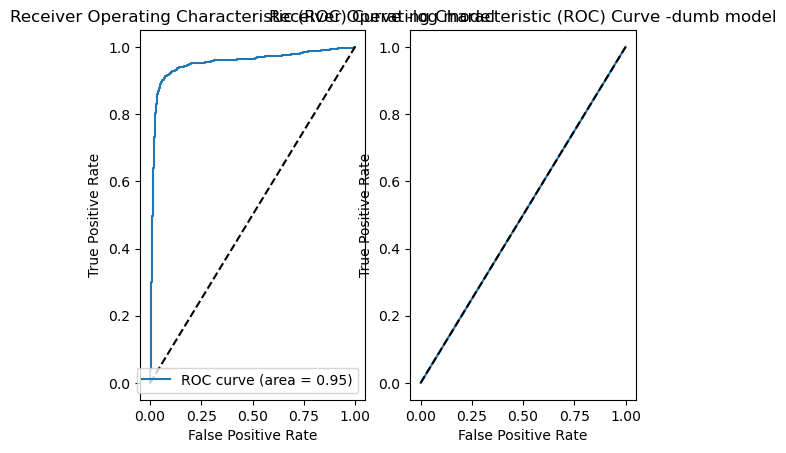

In [243]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
probs = log_model.predict_proba(X_test_model)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_5, probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig,( ax1, ax2) =plt.subplots(1,2)
ax1.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.title.set_text('Receiver Operating Characteristic (ROC) Curve -log model')
ax2.title.set_text('Receiver Operating Characteristic (ROC) Curve -dumb model')
ax1.legend(loc='lower right')

#probs = never_5_clf(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_5, n5_pred_test)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

ax2.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')

plt.show()

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?